In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Record Time vs Balance for Top 10 Logins

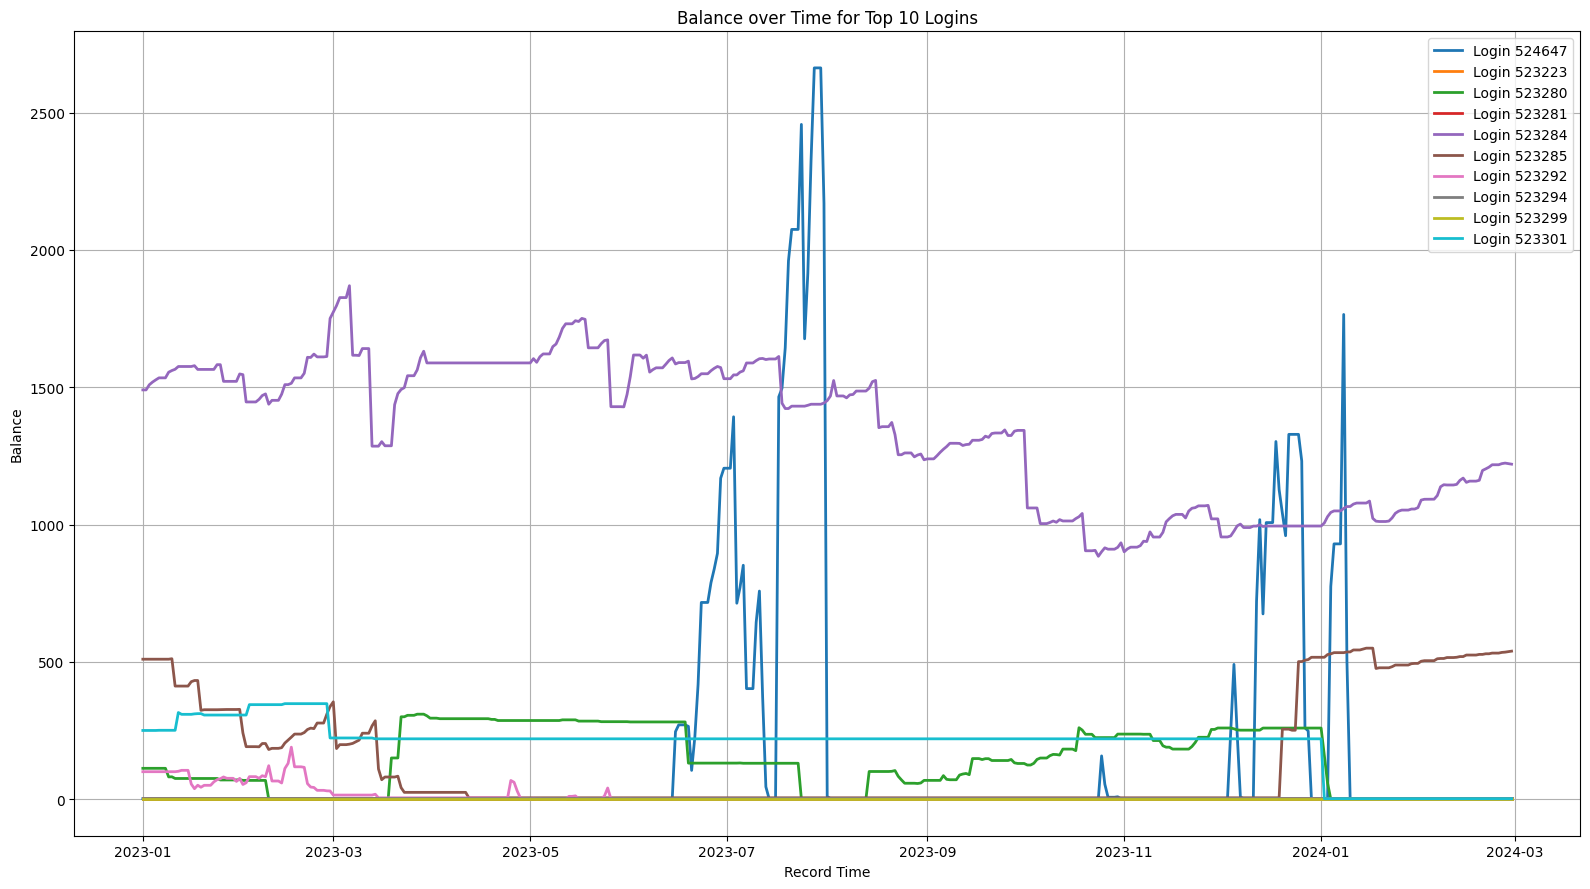

In [11]:
# Load Excel file into a DataFrame
df_daily_report = pd.read_csv("Dataset\daily_report.csv")

# Finding the 10 most occurring login fields
top_10_logins = df_daily_report['login'].value_counts().head(10).index.tolist()

# Filtering the DataFrame based on the top 10 logins
top_10_df = df_daily_report[df_daily_report['login'].isin(top_10_logins)]

# Convert 'record_time' column to datetime
top_10_df.loc[:, 'record_time'] = pd.to_datetime(top_10_df['record_time'])  # Use .loc to set values

# Sorting DataFrame by 'record_time'
top_10_df = top_10_df.sort_values(by='record_time')

# Plotting
plt.figure(figsize=(16, 9))

# Iterate through each login and plot
for i, login in enumerate(top_10_logins):
    login_data = top_10_df[top_10_df['login'] == login]
    plt.plot(login_data['record_time'], login_data['balance'], label=f"Login {login}", linewidth=2)

plt.xlabel('Record Time')
plt.ylabel('Balance')
plt.title('Balance over Time for Top 10 Logins')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Login Location

In [7]:
country_mapping = {
    'CA': 'Canada',
    'AU': 'Australia',
    'CI': "Cote D'ivoire",
    'PK': 'Pakistan',
    'AF': 'Afghanistan',
    'KE': 'Kenya',
    'MQ': 'Martinique',
    'GB': 'United Kingdom',
    'SK': 'Slovakia',
    'CZ': 'Czech Republic',
    'DE': 'Germany',
    'FR': 'France',
    'HR': 'Croatia',
    'PL': 'Poland',
    'ZA': 'South Africa',
    'CH': 'Switzerland',
    'NG': 'Nigeria',
    'SE': 'Sweden',
    'IE': 'Ireland',
    'ES': 'Spain',
    'MX': 'Mexico',
    'IN': 'India',
    'LT': 'Lithuania',
    'GH': 'Ghana',
    'BD': 'Bangladesh',
    'SI': 'Slovenia',
    'HK': 'Hong Kong',
    'NO': 'Norway',
    'NL': 'Netherlands',
    "Cote D'ivoire": "Cote D'ivoire",
    'DO': 'Dominican Republic',
    'PT': 'Portugal',
    'PH': 'Philippines',
    'MY': 'Malaysia',
    'SG': 'Singapore',
    'AT': 'Austria',
    'IT': 'Italy',
    'DK': 'Denmark',
    'TR': 'Turkey',
    'BR': 'Brazil',
    'MA': 'Morocco',
    'TH': 'Thailand',
    'NZ': 'New Zealand',
    'JM': 'Jamaica',
    'KW': 'Kuwait',
    'VN': 'Vietnam',
    'QA': 'Qatar',
    'PE': 'Peru',
    'AL': 'Albania',
    'BB': 'Barbados',
    'RO': 'Romania',
    'BN': 'Brunei',
    'BH': 'Bahrain',
    'U.A.E.': 'United Arab Emirates',
    'RU': 'Russia',
    'CL': 'Chile',
    'MV': 'Maldives',
    'MT': 'Malta',
    'PG': 'Papua New Guinea',
    'UZ': 'Uzbekistan',
    'BG': 'Bulgaria',
    'CO': 'Colombia',
    'LR': 'Liberia',
    'AG': 'Antigua and Barbuda',
    'ZM': 'Zambia',
    'MU': 'Mauritius',
    'AI': 'Anguilla',
    'SA': 'Saudi Arabia',
    'TZ': 'Tanzania',
    'EE': 'Estonia',
    'KR': 'South Korea',
    'KH': 'Cambodia',
    'KY': 'Cayman Islands',
    'JO': 'Jordan',
    'BT': 'Bhutan',
    'MD': 'Moldova',
    'HT': 'Haiti',
    'VC': 'Saint Vincent and The Grenadine',
    'DM': 'Dominica',
    'ME': 'Montenegro',
    'MK': 'North Macedonia',
    'MZ': 'Mozambique',
    'HU': 'Hungary',
    'MN': 'Mongolia',
    'IS': 'Iceland',
    'AR': 'Argentina',
    'EC': 'Ecuador',
    'GU': 'Guam',
    'AW': 'Aruba',
    'PF': 'French Polynesia',
    'LS': 'Lesotho',
    'LU': 'Luxembourg',
    'KN': 'Saint Kitts and Nevis',
    'SX': 'Netherlands',
    'Sint Maarten (Dutch part)' : 'Netherlands',
    'VI': 'Virgin Islands (U.S.)',
    'PY': 'Paraguay',
    'FJ': 'Fiji',
    'GD': 'Grenada',
    'GY': 'Guyana',
    'MF': 'France',
    'TW': 'Taiwan',
    'MW': 'Malawi',
    'GF': 'French Guiana',
    'BJ': 'Benin',
    'GP': 'Guadeloupe',
    'TC': 'Turks and Caicos Islands',
    'BZ': 'Belize',
    'SV': 'El Salvador',
    'BO': 'Bolivia',
    'SN': 'Senegal',
    'GN': 'Guinea',
    'CR': 'Costa Rica',
    'ML': 'Mali',
    'BM': 'Bermuda',
    'BQ': 'Bonaire, Sint Eustatius and Saba',
    'AD': 'Andorra',
    'OM': 'Oman',
    'PM': 'Saint Pierre and Miquelon',
    'RE': 'Reunion',
    'LC': 'Saint Lucia',
    'NC': 'New Caledonia',
    'Kosovo': 'Kosovo',
    'Japan': 'Japan',
    'China': 'China',
    'Venezuela': 'Venezuela',
    'Trinidad and Tobago': 'Trinidad and Tobago',
    'United+Kingdom': 'United Kingdom',
    'Hong+Kong': 'Hong Kong',
    'South+Africa': 'South Africa',
    'Puerto Rico': 'Puerto Rico',
    'Sao Tome and Principe': 'Sao Tome and Principe',
    'French Polynesi': 'French Polynesia',
    'United Arab Emi': 'United Arab Emirates',
    'Hong Kong S.A.R.': 'Hong Kong',
    'Runion--trunc': 'Reunion',
    'Virgin Islands': 'Virgin Islands (U.S.)',
    'Iran': 'Iran',
    'Bosnia and Herz': 'Bosnia and Herzegovina',
    'Saint Vincent a': 'Saint Vincent and The Grenadine',
    'Papua New Guine': 'Papua New Guinea',
    'Myanmar': 'Myanmar',
    'Zimbabwe': 'Zimbabwe',
    'Sierra Leone': 'Sierra Leone',
    'Syria': 'Syria',
    'Trinidad and To': 'Trinidad and Tobago',
    'Palestine': 'Palestine',
    'Burundi': 'Burundi',
    'Laos': 'Laos',
    'Dominican Repub': 'Dominican Republic',
    'United States M': 'United States',
    'Antigua and Bar': 'Antigua and Barbuda',
    'Palau': 'Palau',
    'Djibouti': 'Djibouti',
    'Curaçao': 'Curacao',
    'Swaziland': 'Eswatini',
    'Palestinian Authority': 'Palestine',
    'Mauritania': 'Mauritania',
    'Monaco': 'Monaco',
    'Åland Islands': 'Aland Islands',
    'Gibraltar': 'Gibraltar',
    'Armenia': 'Armenia',
    'Seychelles': 'Seychelles',
    'Paraguay': 'Paraguay',
    'Equatorial Guin': 'Equatorial Guinea',
    'Kyrgyzstan': 'Kyrgyzstan',
    'Faroe Islands': 'Faroe Islands',
    'Antarctica': 'Antarctica',
    'United States': 'United States',
    'Wallis and Futu': 'Wallis and Futuna',
    'Eritrea': 'Eritrea',
    'Turks and Caico': 'Turks and Caicos Islands',
    'land Islands--trunc': 'land Islands',  # Truncated, assuming Åland Islands
    'Congo (Republic': 'Republic of the Congo',
    'Chad': 'Chad',
    'Samoa': 'Samoa',
    'Sao Tome and Pr': 'Sao Tome and Principe',
    'Tonga': 'Tonga',
    'Tahiti': 'French Polynesia',  # Assuming Tahiti is part of French Polynesia
    'Åland Islands': 'Aland Islands',
    'Nauru': 'Nauru',
    'Taiwan': 'Taiwan',
    'Solomon Islands': 'Solomon Islands',
    'Comoros': 'Comoros',
    'NigeriaHouse no 3 Pre': 'Nigeria',  # Unclear data, assuming Nigeria
    'Tajikistan': 'Tajikistan',
    'Nicaragua': 'Nicaragua',
    'Curaçao': 'Curacao',
    'Kiribati': 'Kiribati',
    'Saint Martin (F': 'Saint Martin',
    'Bonaire, Sint E': 'Bonaire, Sint Eustatius and Saba',
    'Saint Kitts and': 'Saint Kitts and Nevis',  # Incomplete entry, assuming Nevis
    'South Georgia a': 'South Georgia and The South Sandwich Islands',  # Incomplete entry, assuming South Sandwich Islands
    'British Indian': 'British Indian Ocean Territory',
    'Guernsey': 'Guernsey',
    'Liechtenstein': 'Liechtenstein',
    'Greenland': 'Greenland',
    'French Southern': 'France',
    'YT' : 'France',
    'Korea': 'South Korea',  # Assuming South Korea
    'BS': 'The Bahamas',
    'ID': 'Indonesia',
    'RÃ©union': 'France',  # Assuming Réunion is part of France
    'AE': 'United Arab Emirates'
}

Number of Data Entries: 40512


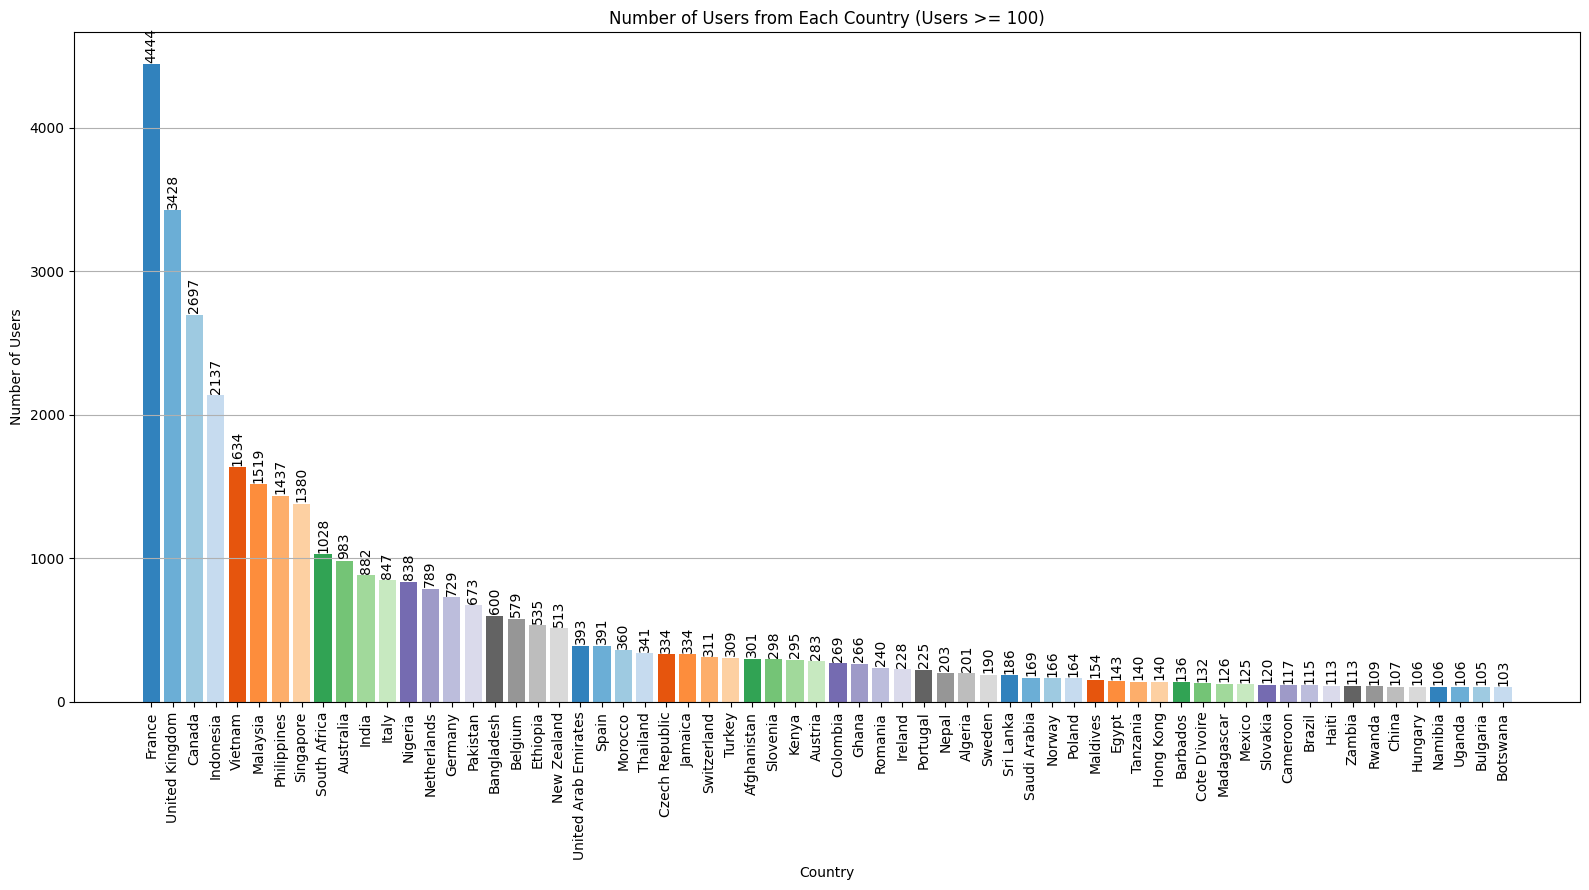

In [8]:
# Load Excel file into a DataFrame
df_login = pd.read_csv("Dataset\login.csv")

# Replace country names
df_login['country'] = df_login['country'].replace(country_mapping)

# Display DataFrame (table)
print(f"Number of Data Entries: {len(df_login)}")

# Count occurrences of each country
country_counts = df_login['country'].value_counts()

# Filter out countries with fewer than 100 occurrences
country_counts_filtered = country_counts[country_counts >= 100]

# Define colors for each country
colors = plt.cm.tab20c.colors[:len(country_counts_filtered)]

# Plot the counts
plt.figure(figsize=(16, 9))
bars = plt.bar(country_counts_filtered.index, country_counts_filtered.values, color=colors, width=0.8)
""
# Add labels with values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, int(yval), ha='center', va='bottom', rotation=90)

plt.title('Number of Users from Each Country (Users >= 100)')
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.xticks(rotation=90)  # Rotate labels by 90 degrees
plt.grid(axis='y')

# Show plot
plt.tight_layout()
plt.show()


User Registrations Over Time

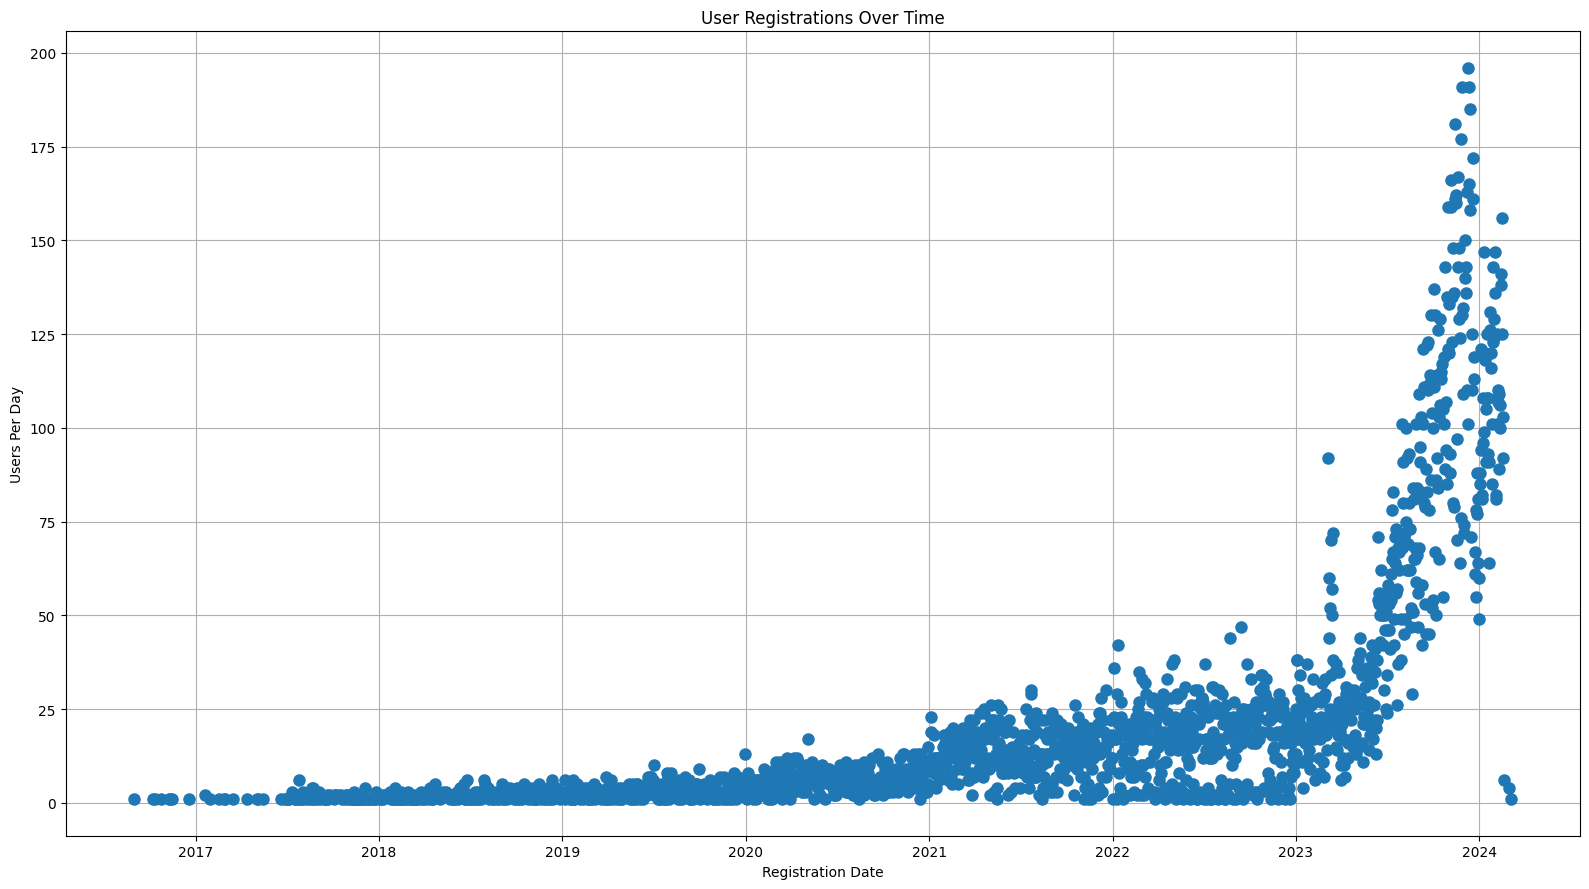

In [9]:
# Convert reg_date to datetime
df_login['reg_date'] = pd.to_datetime(df_login['reg_date'], unit='s')

# Group by registration date and count occurrences
registration_counts = df_login.groupby(df_login['reg_date'].dt.date).size().reset_index(name='occurrences')

# Plotting
plt.figure(figsize=(16, 9))
plt.plot(registration_counts['reg_date'], registration_counts['occurrences'], marker='o', linestyle='', markersize=8)
plt.title('User Registrations Over Time')
plt.xlabel('Registration Date')
plt.ylabel('Users Per Day')
plt.grid(True)
plt.tight_layout()
plt.show()

# Trades

Number of Data Entries: 4521777


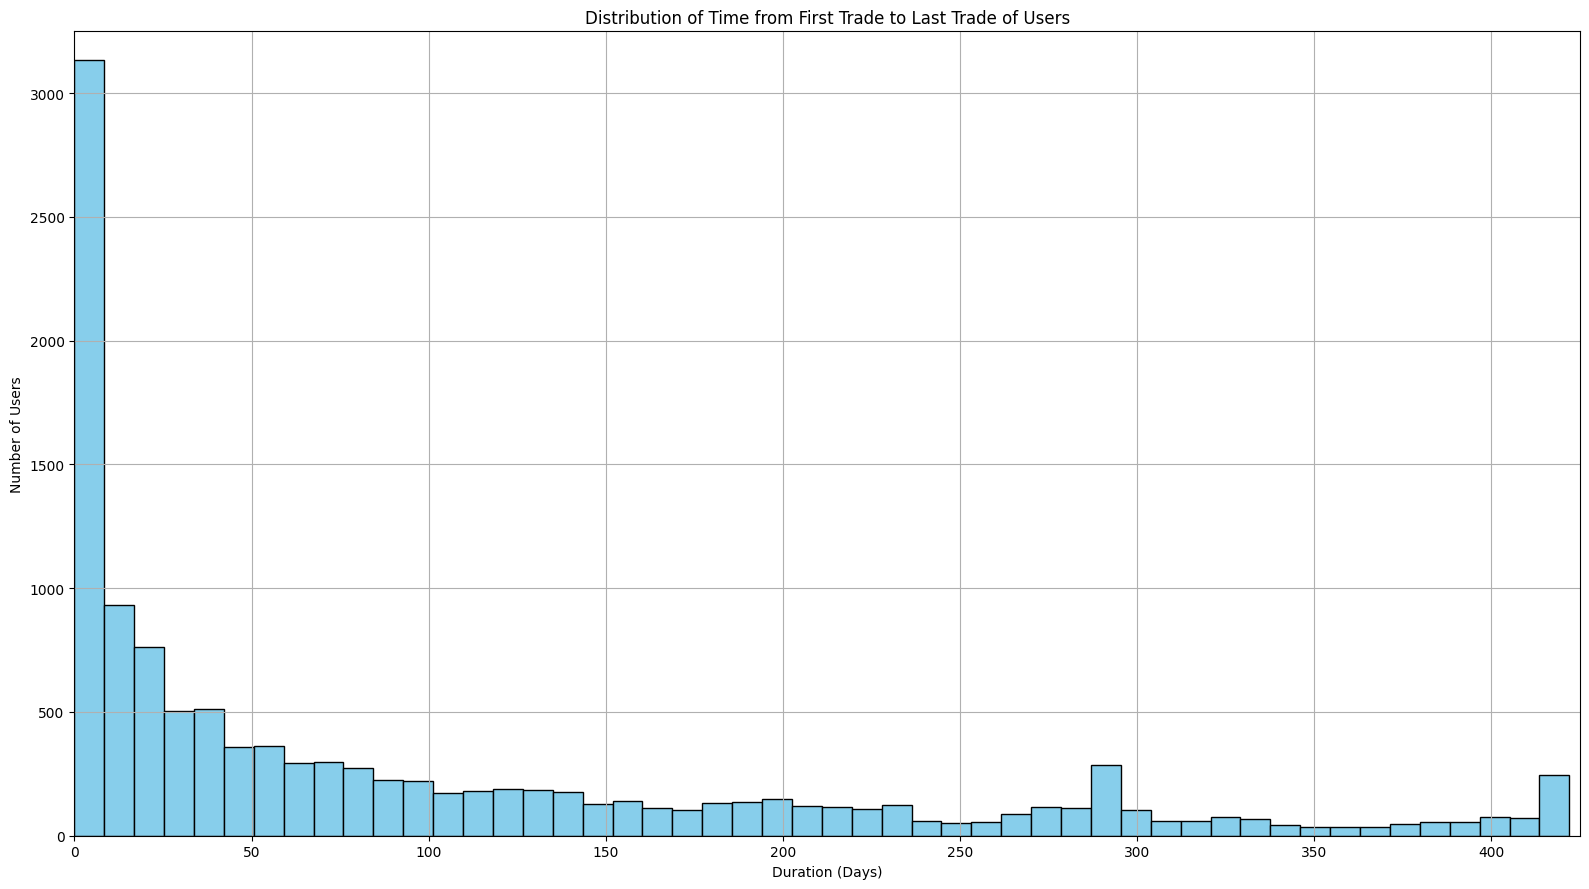

In [13]:
# Load Excel file into a DataFrame
df_trades = pd.read_csv("Dataset/trades.csv")

# Display DataFrame (table)
print(f"Number of Data Entries: {len(df_trades)}")

# Convert open_time and close_time to datetime objects
df_trades['open_time'] = pd.to_datetime(df_trades['open_time'], unit='s')
df_trades['close_time'] = pd.to_datetime(df_trades['close_time'], unit='s')

# Group trades by login ID and find the duration between the first and last trade for each login
login_duration = df_trades.groupby('login').apply(lambda x: (x['close_time'].max() - x['open_time'].min()).days)

# Plot histogram of durations
plt.figure(figsize=(16, 9))
plt.hist(login_duration, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Time from First Trade to Last Trade of Users')
plt.xlabel('Duration (Days)')
plt.ylabel('Number of Users')
plt.grid(True)

# Set custom limits for x-axis and y-axis
plt.xlim(0, 425)  # Set limits for x-axis
plt.ylim(0, 3250)  # Set limits for y-axis

plt.tight_layout()
plt.show()

# Trades Per Day

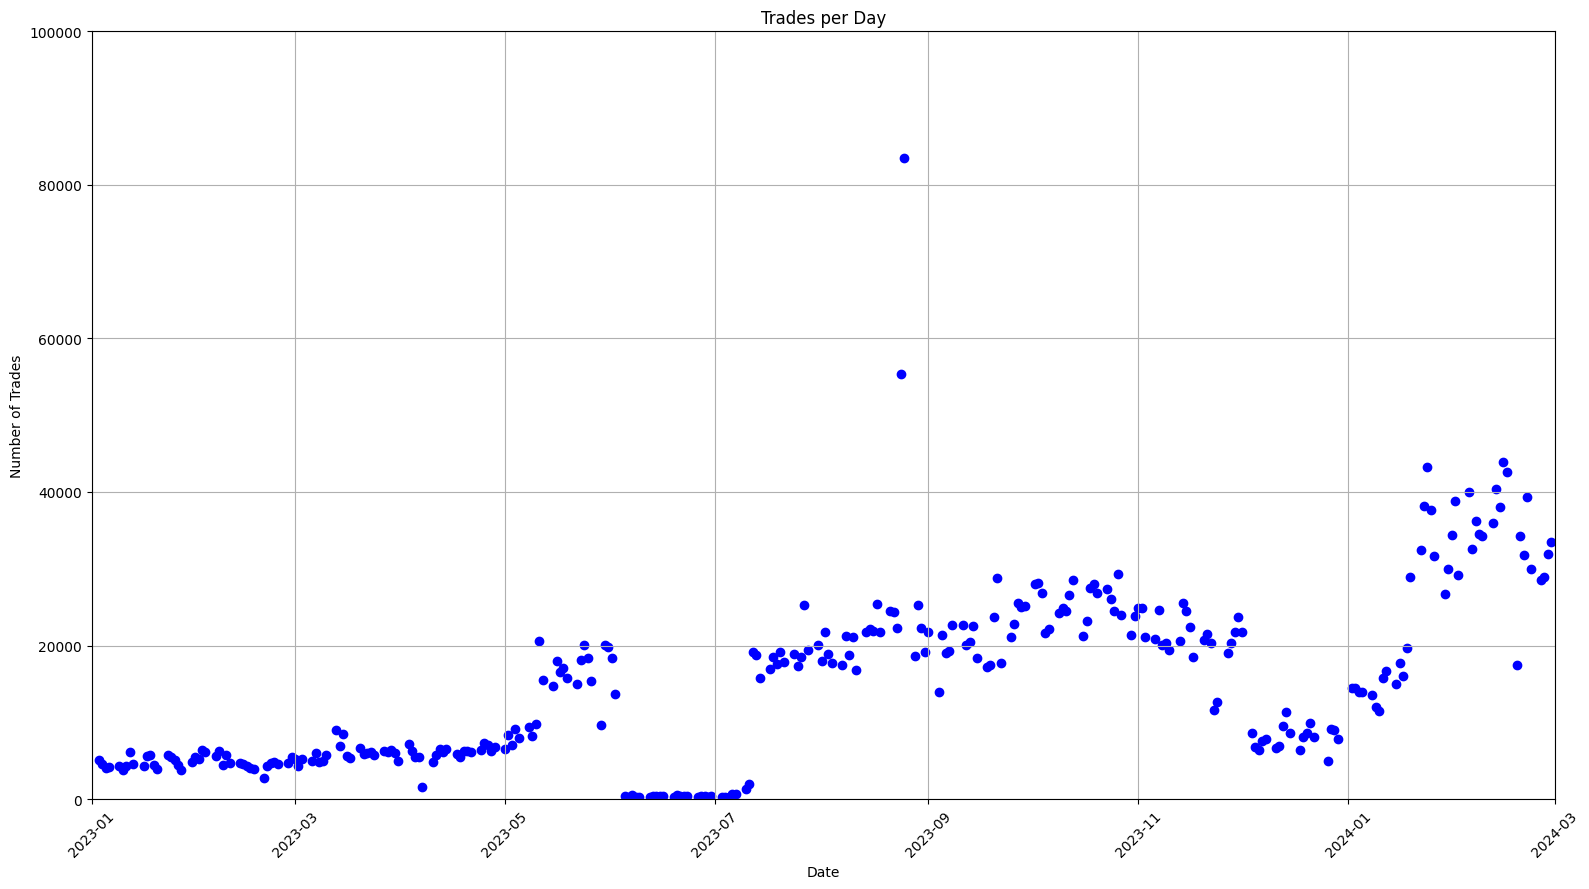

In [9]:
trades_dataframe = pd.read_csv("Dataset/trades.csv")

# Convert open_time and close_time to datetime objects
trades_dataframe['open_time'] = pd.to_datetime(trades_dataframe['open_time'], unit='s')
trades_dataframe['close_time'] = pd.to_datetime(trades_dataframe['close_time'], unit='s')

# Extract the date from the open_time column
trades_dataframe['date'] = trades_dataframe['open_time'].dt.date

# Calculate the number of trades per day
trades_per_day = trades_dataframe.groupby('date').size().reset_index(name='trades_count')

# Create scatter plot
plt.figure(figsize=(16, 9))
plt.scatter(trades_per_day['date'], trades_per_day['trades_count'], color='blue')
plt.title('Trades per Day')
plt.xlabel('Date')
plt.ylabel('Number of Trades')
plt.xticks(rotation=45)

# Set x-axis limits between 2023 and March 2024
plt.xlim(pd.Timestamp('2023-01-01'), pd.Timestamp('2024-03-01'))
plt.ylim(0, 100000)

plt.grid(True)
plt.tight_layout()
plt.show()

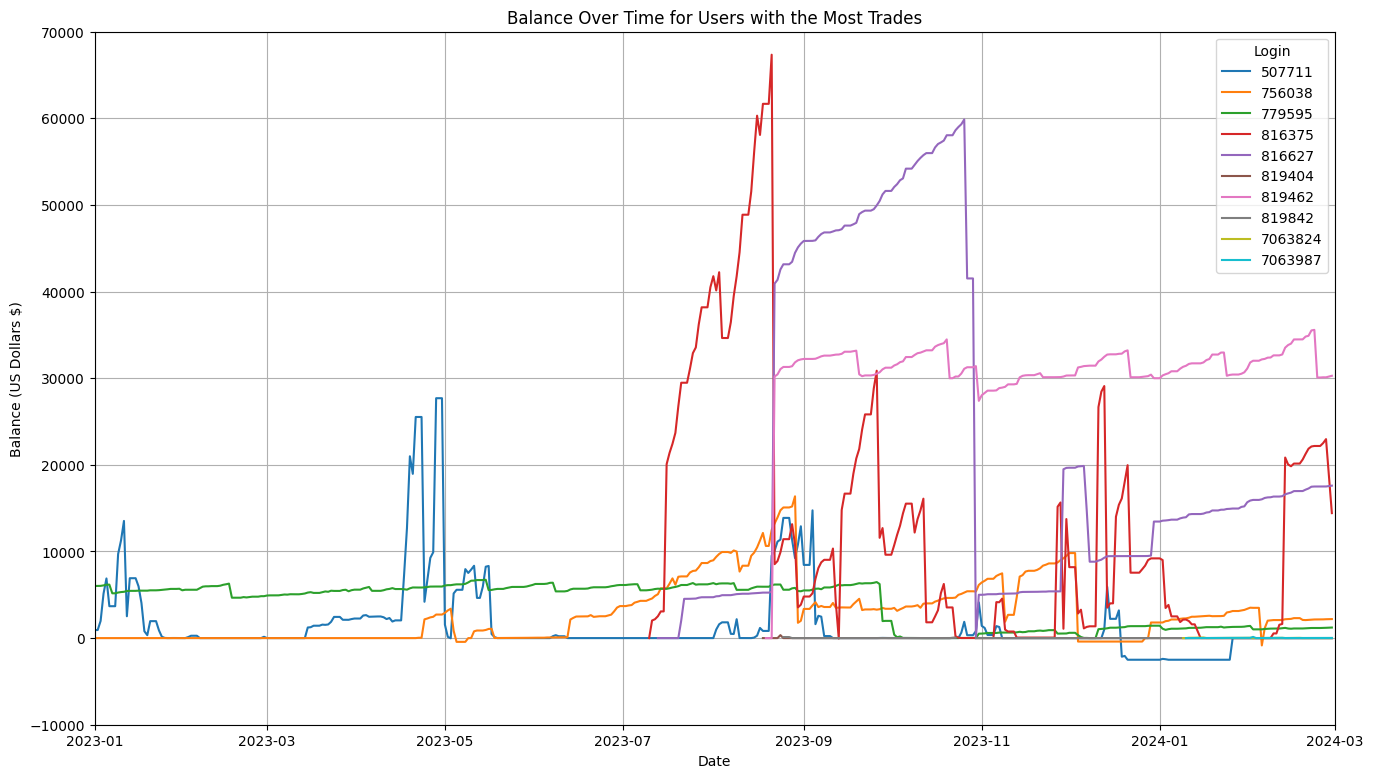

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

trades_dataframe = pd.read_csv("Dataset/trades.csv")
daily_dataframe = pd.read_csv("Dataset/daily_report.csv")

# Filter daily_dataframe for the specified time range
daily_dataframe = daily_dataframe[(daily_dataframe['record_time'] >= '2023-01-01') & (daily_dataframe['record_time'] <= '2024-03-01')]

# Count occurrences of each login record
login_counts = trades_dataframe['login'].value_counts()

# Get the 10 most occurring login records
top_logins = login_counts.head(10).index.tolist()

# Filter daily_dataframe for the top login records in login_counts
filtered_daily = daily_dataframe[daily_dataframe['login'].isin(top_logins)].copy()  # Make a copy to avoid SettingWithCopyWarning

# Convert record_time to datetime type using .loc to modify the DataFrame
filtered_daily.loc[:, 'record_time'] = pd.to_datetime(filtered_daily['record_time'])

# Group by login and record_time and calculate the mean balance for each group
grouped = filtered_daily.groupby(['record_time', 'login'])['balance'].mean().unstack()

# Plotting
plt.figure(figsize=(16, 9))
for login in grouped.columns:
    plt.plot(grouped.index, grouped[login], label=str(login))

plt.title('Balance Over Time for Users with the Most Trades')
plt.xlabel('Date')
plt.ylabel('Balance (US Dollars $)')
plt.xlim(pd.Timestamp('2023-01-01'), pd.Timestamp('2024-03-01'))
plt.ylim([-10000, 70000])
plt.legend(title='Login')
plt.grid(True)
plt.show()
